## Task: *C. elegans* dead/live classification

For an example of how we can use images to create input for ML-based analyses, we will revisit the *C. elegans* data from day 4.
This dataset (https://bbbc.broadinstitute.org/BBBC010) is a multiwell experiment of *C. elegans* exposed to microbial pathogens. Worms in well columns 1-12 were treated with antibiotics and should be mostly **alive**, Worms in columns 13-24 were not given antibiotics and should mostly be **dead**

The directory ```data/BBBC010/``` will contain 2 files for each well that was imaged:
* ```data/BBBC010/{well_name}image.tif``` : GFP-channel image of the well
* ```data/BBBC010/{well_name}labels.tif``` : outlines of the individual worms

Use ```glob``` to create lists ```img_files``` and ```label_files``` containing the paths of image and label files respectively. Make sure the lists are sorted!

In [1]:
from glob import glob
imgs_path = glob('data/BBBC010/*image.tif')
labels_path = glob('data/BBBC010/*labels.tif')
imgs_path.sort()
labels_path.sort()

read the first files in ```img_files``` and ```label_files``` and display them:

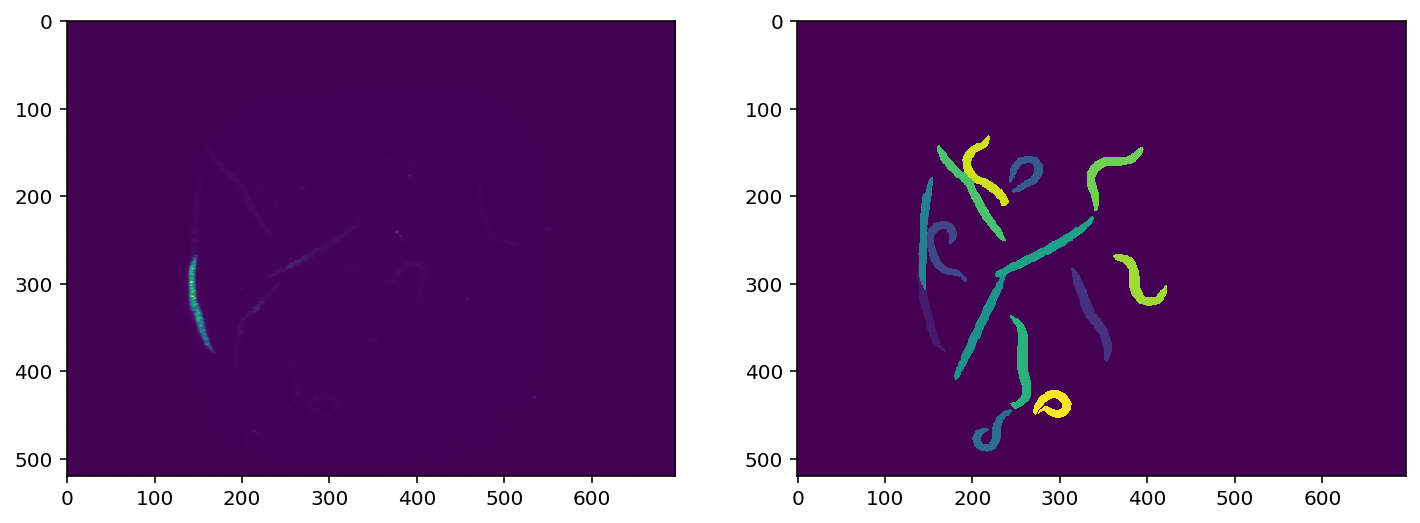

In [2]:
from skimage.io import imread
from matplotlib import pyplot as plt

image_1 = imread(imgs_path[0])
label_1 = imread(labels_path[0])

fig, axs = plt.subplots(ncols=2)
axs[0].imshow(image_1)
axs[1].imshow(label_1)

Extract the well name (e.g. A01) from the filename. Note: use the ```.split('/')``` method to split the filename at slashes.



In [3]:
wellname =imgs_path[0].split('/')[2]
wellname = wellname[:-9]
wellname

'A01'

Create a variable ```alive``` depending on the column of the well. Alive should be 1 for column indices < 13 and 0 otherwise

In [4]:
alive = 1 if int(wellname[1:3]) < 13 else 0
alive

1

Use ```regionprops_table``` to generate a table of region properties with the properties defined in ```props```



In [5]:
from skimage.measure import regionprops_table

props = ('mean_intensity', 'min_intensity', 'max_intensity', 'area', 'perimeter', 'convex_area')
table = regionprops_table(label_1, image_1, properties= props)

table

{'mean_intensity': array([978.35422343, 106.80016863, 106.10453649, 105.61232349,
        103.97680412, 349.90151515, 124.53592073, 152.71549534,
        107.94043624, 133.66886326, 104.9416826 , 108.33656644,
        104.82936508, 111.99123905]),
 'min_intensity': array([123.,  96.,  93.,  95.,  91.,  97.,  97.,  96.,  95.,  96.,  94.,
         97.,  94.,  93.]),
 'max_intensity': array([2721.,  149.,  190.,  122.,  199., 2717.,  321.,  388.,  167.,
         221.,  160.,  180.,  129.,  178.]),
 'area': array([ 734, 1186, 1014,  779,  776, 1056, 1211, 1181, 1192, 1214, 1046,
        1031, 1008,  799]),
 'perimeter': array([217.98885271, 255.27922061, 262.2081528 , 209.96551211,
        201.23759005, 274.91168825, 291.63455967, 287.50461736,
        251.85281374, 288.71782079, 242.16652224, 224.06601718,
        243.80613255, 205.75840533]),
 'convex_area': array([1053, 1574, 2153, 1251, 1189, 1342, 1348, 1496, 2137, 1625, 2239,
        1988, 2272, 1092])}

Create a Pandas DataFrame from the output

Add the 'alive' value as a column

In [11]:
import pandas as pd

pd_table = pd.DataFrame(table)

pd_table['alive']=alive
pd_table

,mean_intensity,min_intensity,max_intensity,area,perimeter,convex_area,alive
0,178.891487,99.0,530.0,1069,286.232539,1202,1
1,104.943612,96.0,144.0,1135,271.178716,2824,1
2,146.833032,99.0,391.0,1108,279.320851,1319,1
3,136.290278,96.0,409.0,720,221.622366,1440,1
4,100.713489,91.0,122.0,897,257.137085,2013,1
5,108.642739,97.0,142.0,1212,283.379726,2381,1
6,113.843434,98.0,365.0,1188,283.421356,3299,1
7,105.877287,95.0,181.0,929,223.580736,1876,1
8,124.679558,100.0,255.0,1086,272.048773,1799,1
9,117.633475,93.0,335.0,944,265.078210,1853,1


Now create a table of region properties for all wells.

The loop below goes over all pairs of ```(img_file, label_file)``` using the ```zip()``` function.

You should be able to use your solutions from above with minor modifications.

In [12]:
# the regionprops we want to calculate
props = ('mean_intensity', 'min_intensity', 'max_intensity', 'area', 'perimeter', 'convex_area')

# create empty data frame
df = pd.DataFrame()

for (img_file, label_file) in zip(imgs_path, labels_path):

    # TODO: load the images
    image_1 = imread(img_file)
    label_1 = imread(label_file)
    # TODO: get well name & alive status
    wellname =img_file.split('/')[2]
    wellname = wellname[:-9]
    alive = 1 if int(wellname[1:3]) < 13 else 0
    # TODO: get regionprops and save as dataframe named dfi
    table = regionprops_table(label_1, image_1, properties= props)
    dfi = pd.DataFrame(table)
    dfi['alive']=alive
    # append to the dataframe of all wells
#     df = df.append(dfi, ignore_index=True)
    df = pd.concat([df, dfi], ignore_index=True)

# show result
df

,mean_intensity,min_intensity,max_intensity,area,perimeter,convex_area,alive
0,978.354223,123.0,2721.0,734,217.988853,1053,1
1,106.800169,96.0,149.0,1186,255.279221,1574,1
2,106.104536,93.0,190.0,1014,262.208153,2153,1
3,105.612323,95.0,122.0,779,209.965512,1251,1
4,103.976804,91.0,199.0,776,201.237590,1189,1
...,...,...,...,...,...,...,...
1302,117.633475,93.0,335.0,944,265.078210,1853,1
1303,102.395152,91.0,147.0,825,221.030483,1777,1
1304,694.194245,112.0,2043.0,973,249.480231,1802,1
1305,101.428169,93.0,126.0,1065,281.237590,2506,1


Convert the 'alive' column to a numpy array called ```y```

Convert all other columns to a numpy array called ```X```

In [8]:
import numpy as np

y = np.asarray(df['alive'])

x = np.asarray(df.iloc[:,[0,1,2,3,4,5]])


Normalize ```X```

In [9]:
from sklearn.preprocessing import scale

x = scale(x)
x

array([[ 1.98363963,  0.9632074 ,  1.50835946, -1.79032554, -1.59498201,
        -0.9833755 ],
       [-0.7402133 , -0.65177934, -0.88460715,  1.34286879, -0.11211683,
        -0.02734379],
       [-0.74238735, -0.83122231, -0.8464611 ,  0.1505913 ,  0.16341471,
         1.03511755],
       ...,
       [ 1.09555933,  0.30524984,  0.87755411, -0.13361438, -0.34271579,
         0.39103477],
       [-0.75700232, -0.83122231, -0.90600615,  0.50411544,  0.92012727,
         1.68287032],
       [-0.74611743, -0.95085096, -0.85297384, -0.33463791, -0.48082441,
         1.71590021]])

Use principal component analysis to display the features in 2D



Error:  0.09334353481254781


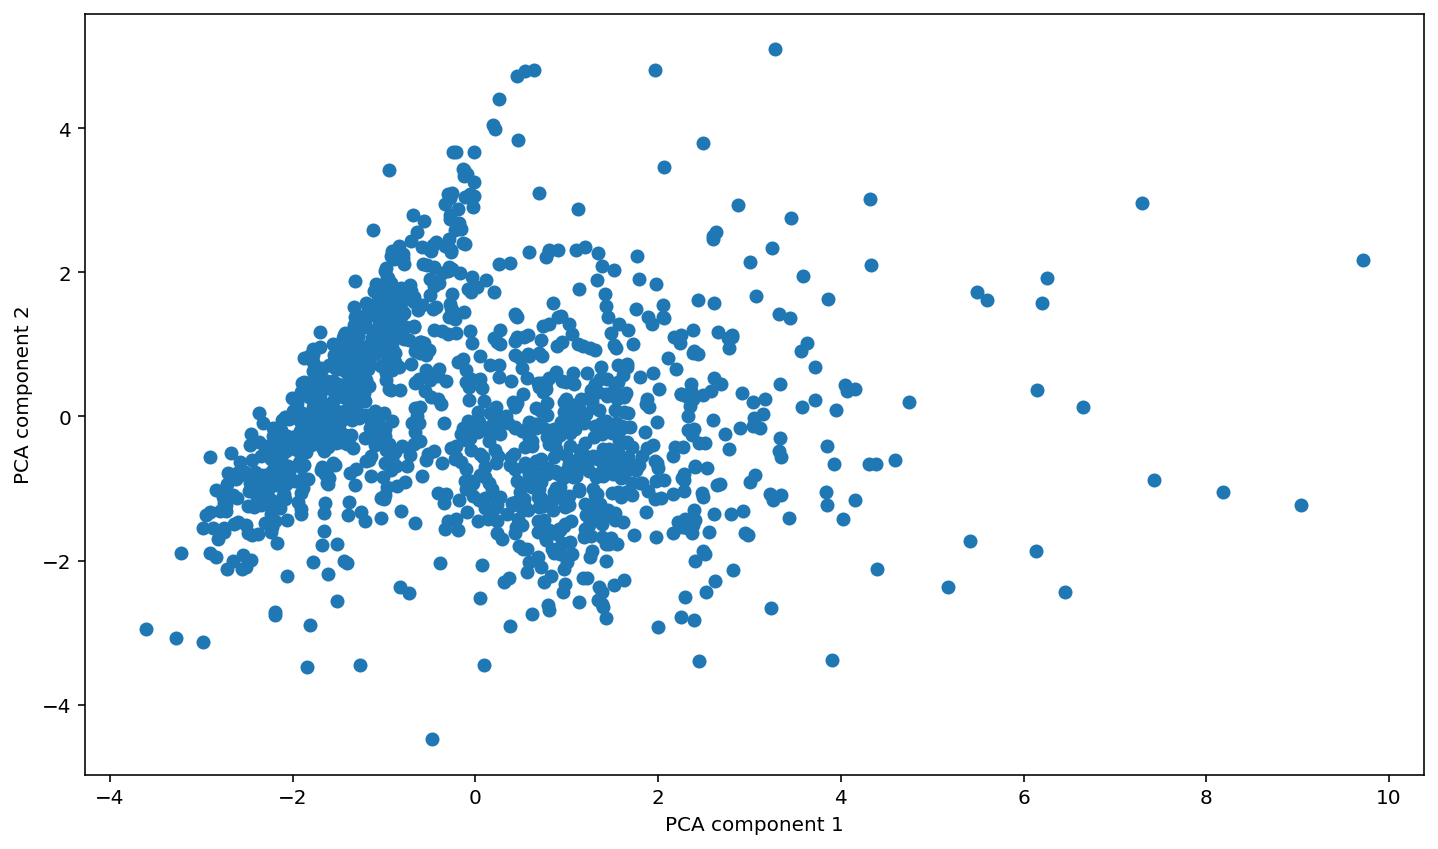

In [21]:
from sklearn.decomposition import PCA

# PCA is a class and not a function, we have to create an object that we can use.
pca = PCA()

new_data = pca.fit_transform(x)

#plt.plot(pca.explained_variance_ratio_[:10]);
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2)

clusters = kmeans.fit_predict(new_data)

print("Error: ", min(np.mean(np.abs(y- clusters)), 1-np.mean(np.abs(y - clusters))))

# plot 1: color by predicted clusters
# fig = plt.figure()
# ax = Axes3D(fig)
plt.scatter(new_data[:,0], new_data[:,1])
# ax.set_xlabel('PCA component 1')
plt.xlabel('PCA component 1')
# ax.set_ylabel('PCA component 2')
plt.ylabel('PCA component 2')
plt.show()




Cluster the data points using KMeans, color the points in your plot according to the output of KMeans

Error:  0.09334353481254781


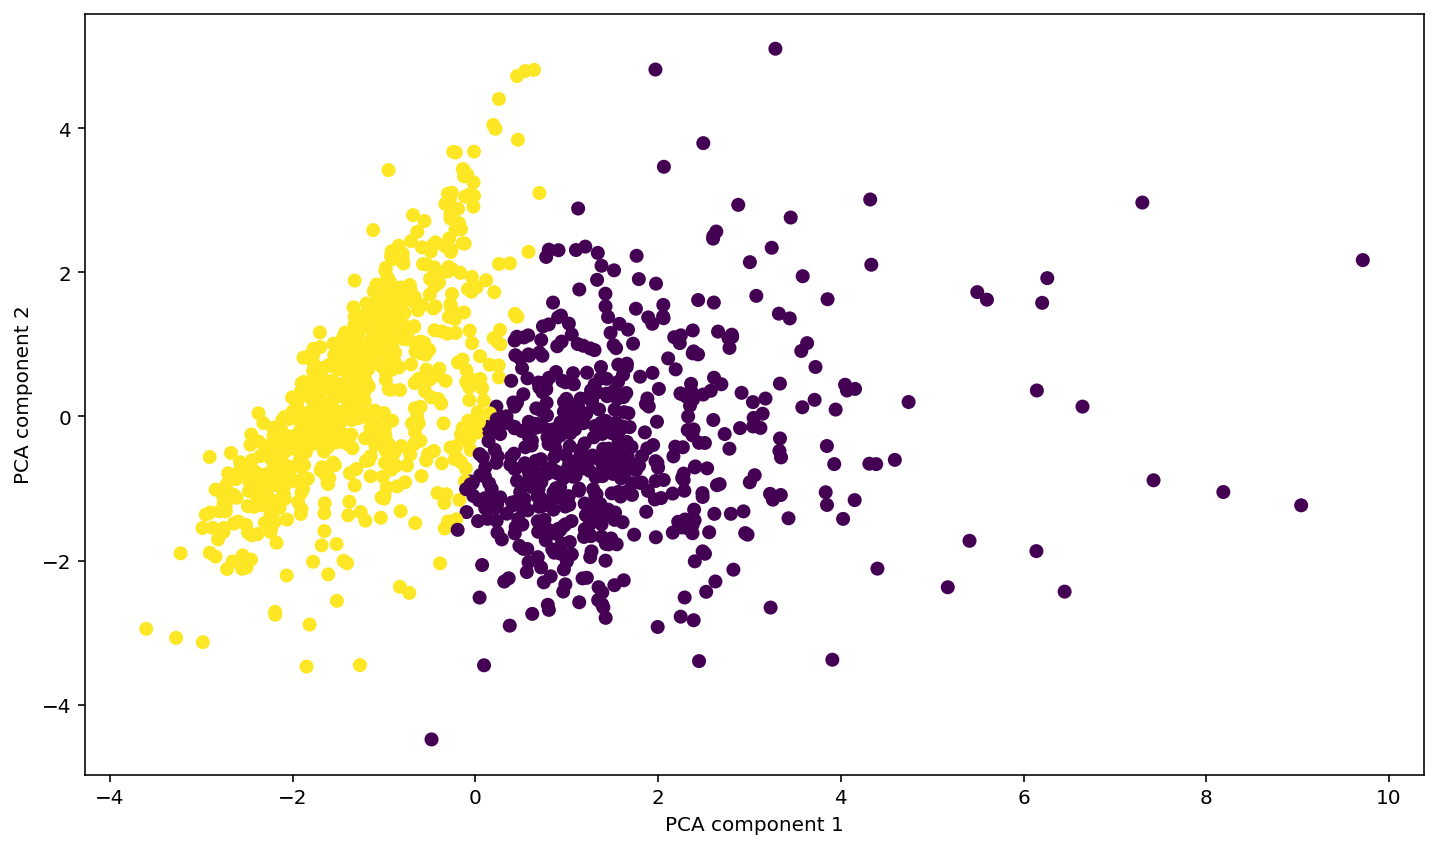

In [20]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2)

clusters = kmeans.fit_predict(new_data)

print("Error: ", min(np.mean(np.abs(y- clusters)), 1-np.mean(np.abs(y - clusters))))

# plot 1: color by predicted clusters
# fig = plt.figure()
# ax = Axes3D(fig)
plt.scatter(new_data[:,0], new_data[:,1], c=clusters)
# ax.set_xlabel('PCA component 1')
plt.xlabel('PCA component 1')
# ax.set_ylabel('PCA component 2')
plt.ylabel('PCA component 2')
plt.show()


Now, color the points according to the true *dead/alive* information in ```y```:

Error:  0.09334353481254781


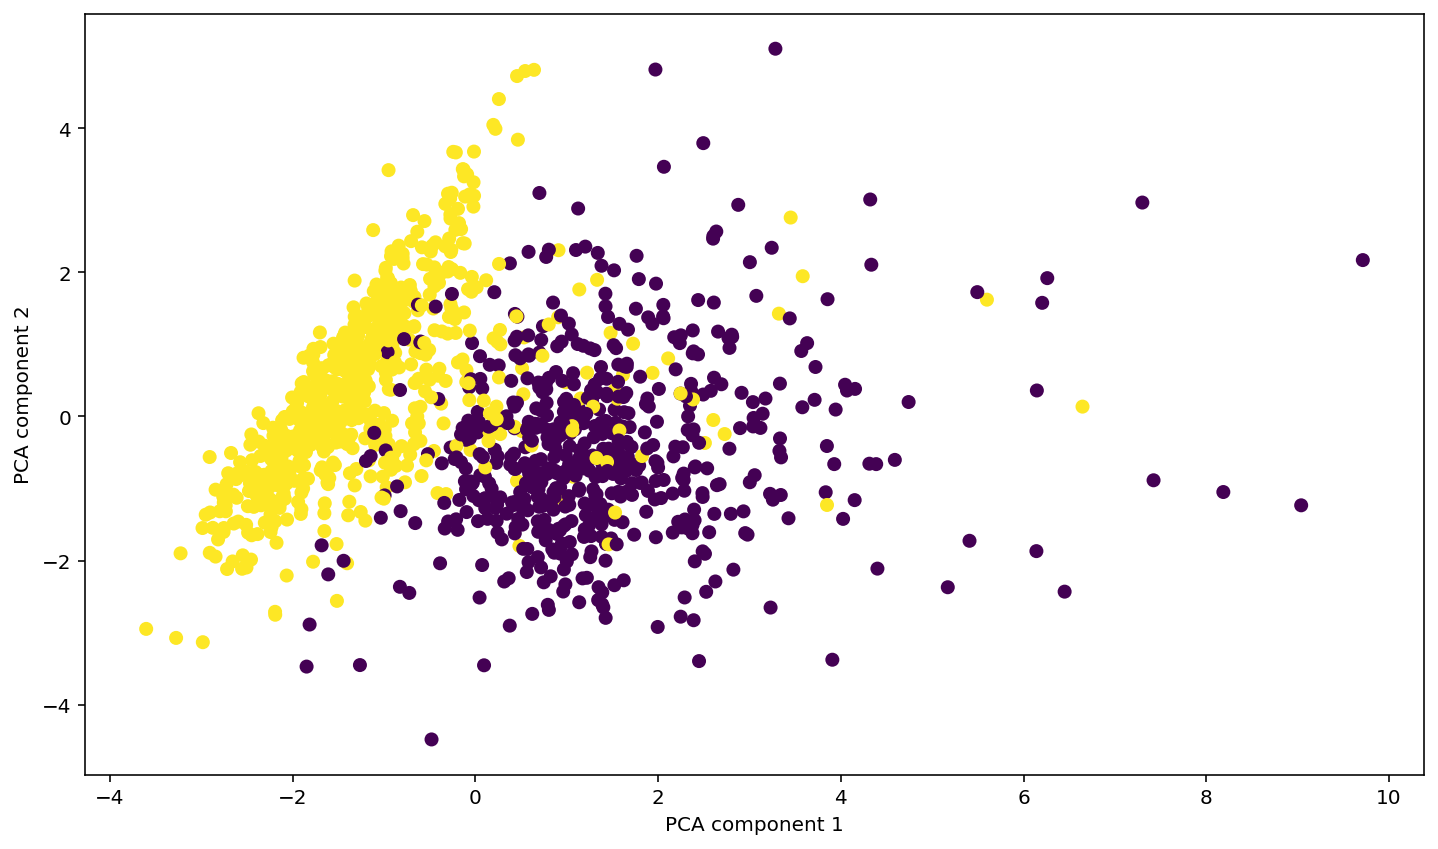

In [22]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2)

clusters = kmeans.fit_predict(new_data)

print("Error: ", min(np.mean(np.abs(y- clusters)), 1-np.mean(np.abs(y - clusters))))

# plot 1: color by predicted clusters
# fig = plt.figure()
# ax = Axes3D(fig)
plt.scatter(new_data[:,0], new_data[:,1], c=y)
# ax.set_xlabel('PCA component 1')
plt.xlabel('PCA component 1')
# ax.set_ylabel('PCA component 2')
plt.ylabel('PCA component 2')
plt.show()



For training and testing a supervised learning model, we can use the ```train_test_split``` to split ```X``` and ```y``` into a training and test set (85-15%).

Set the variables ```full_x``` and ```full_y``` to your normalized features and dead/alive classification:

In [17]:
from sklearn.model_selection import train_test_split

full_x = x
full_y = y

train_X, test_X, train_Y, test_Y = train_test_split(full_x, full_y, train_size=0.85)

Create a supervised classification model (e.g. Decision Tree), fit it on the train data and score it on the test data:

**Optional:** if you built a decision tree model, plot the tree and see what features (if any) are most helpful in differentiating dead and alive worms

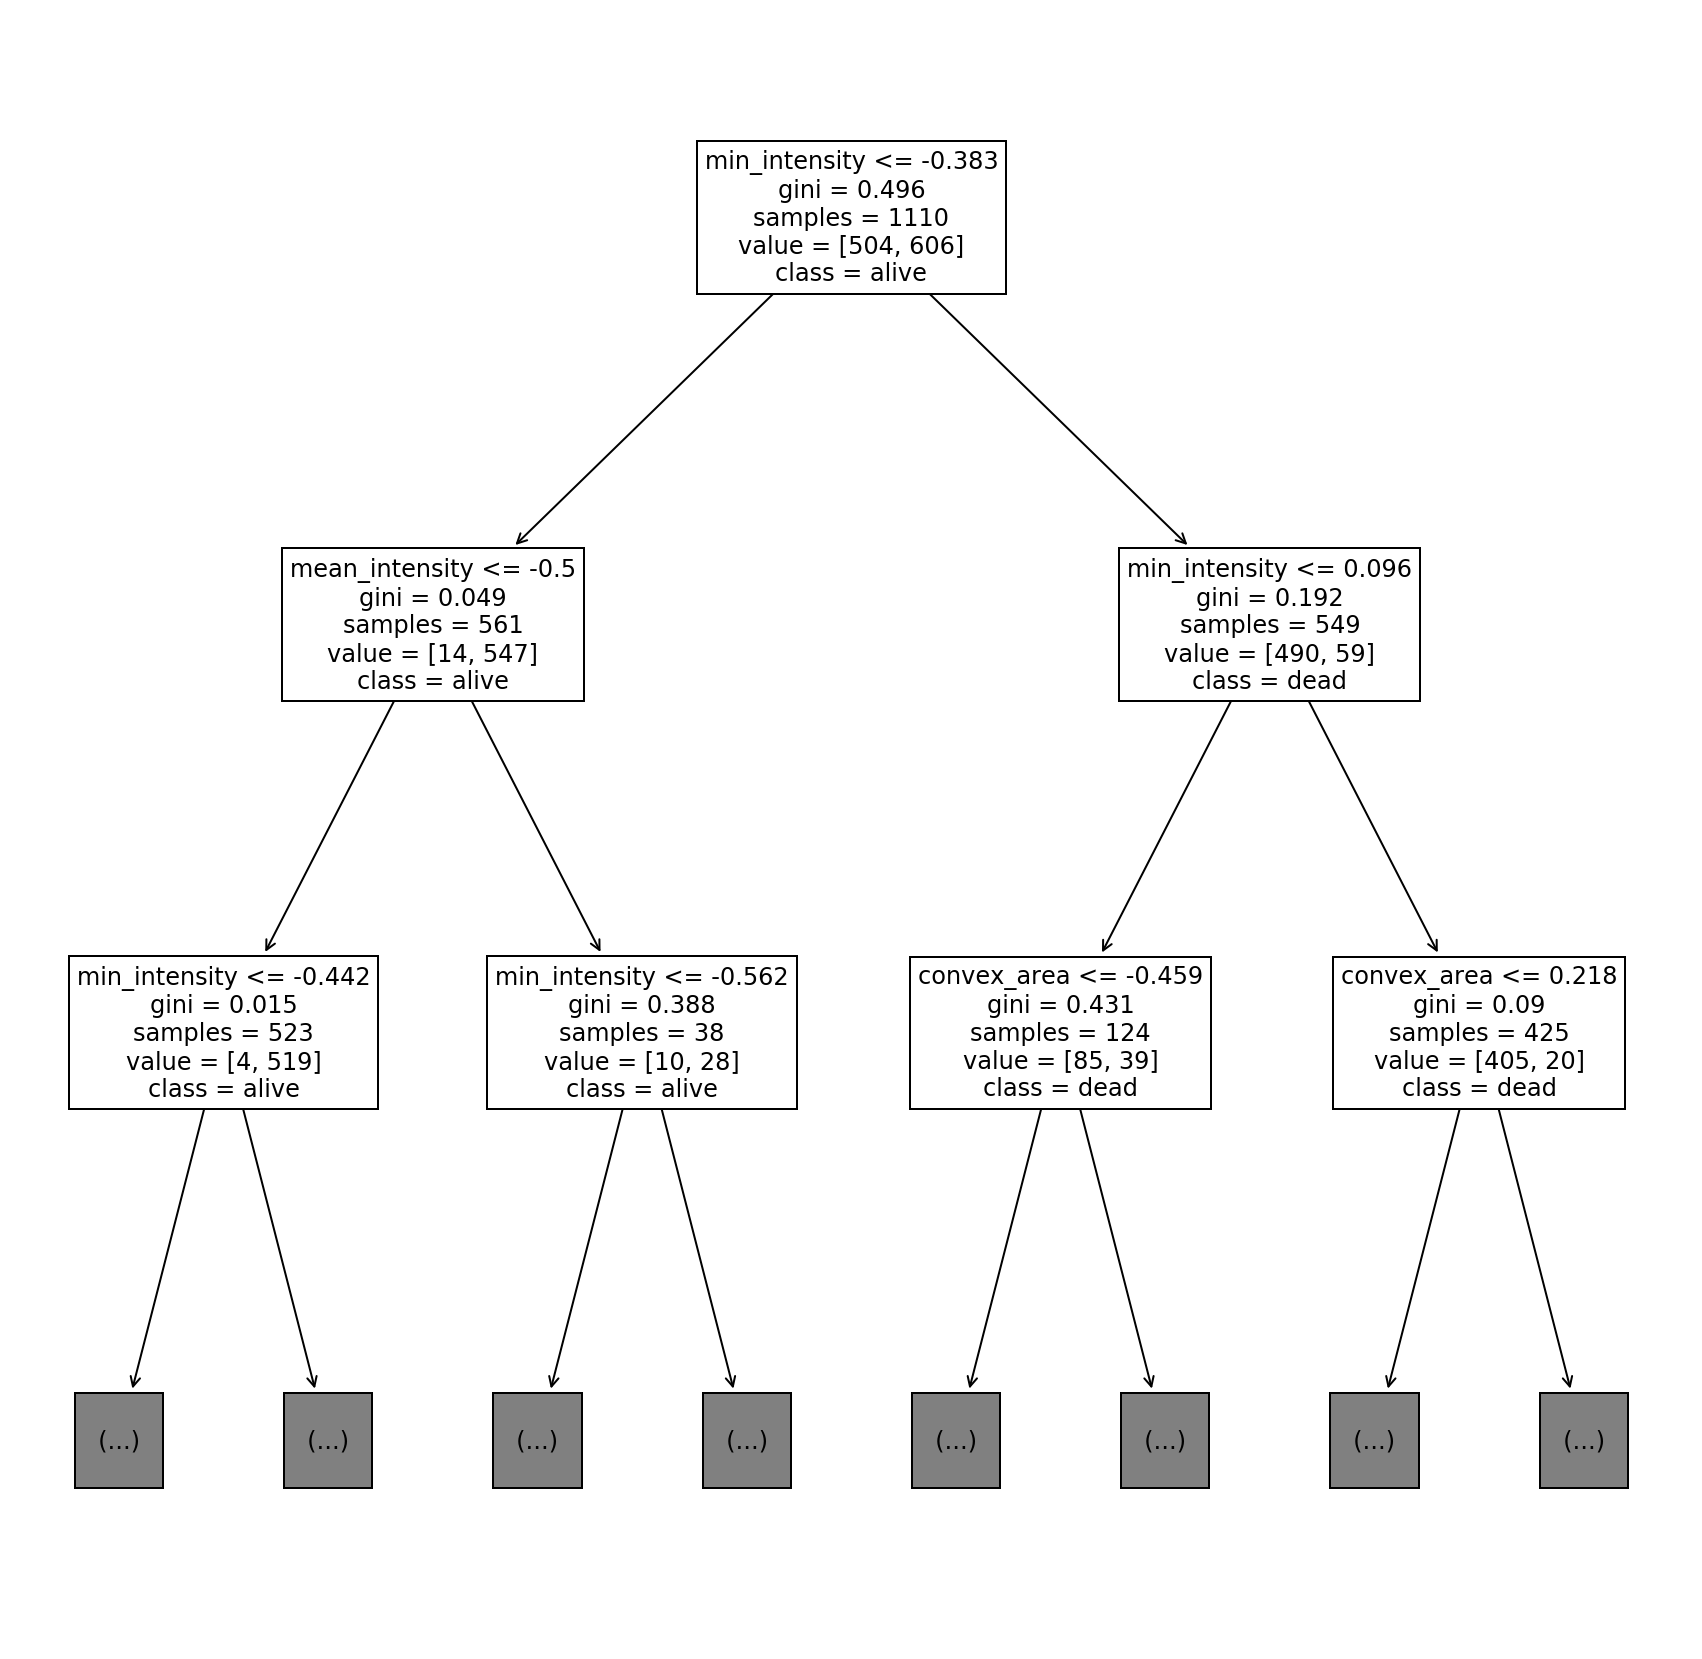

In [19]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_Y)
pred = clf.predict(test_X)
pred
clf.score(test_X, test_Y)

from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(clf, max_depth=2, feature_names=df.columns, class_names=['dead', 'alive'], ax=ax, fontsize=12);